In [96]:
# Import necessary libraries
from encodings import search_function
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary tools from the sklearn library
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Import sklearn library tools used ONLY for validating my results
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, f1_score, accuracy_score, recall_score, precision_score, auc, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.decomposition import PCA
from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')


There are 9 attributes. These attributes are the columns of the data set. The age column is not included in the dataset. But in the description it is given that age = Rings + 1.5.

- Sex – The data type is categorical and there are three types in this data. M, F and I.
- Length – It is the continuous datatype and the units are in mm. It is the longest shell measurement.
- Diameter – It is also continuous datatype and the units are in mm. It is the perpendicular to length.
- Height – It is a continuous data type. It is numerical just like diameter and length. Its units are in mm and it is - the meat in the shell.
- Whole weight – A continuous data measured in grams. It is the weight of whole abalone.
- Shucked weight – It is same as whole weight, continuous data, measured in grams and it is the weight of the meat.
- Viscera weight – It is also continuous data, measured in grams and it is the git weight after bleeding.
- Shell weight – It is the weight of the shell after being dried. It is continuously varying data.
- Rings – It is an integer and adding 1.5 to rings gives the age of the abalone.

In [119]:
# load datasets function
def load_data(data_file_name):
    data_dir = "..\..\..\data\data_classification"
    data_path = os.path.join(data_dir, data_file_name)
    df = pd.read_csv(data_path)
    data_X = df.iloc[:,:-1]
    data_y = df.iloc[:,-1]
    scaler_X = StandardScaler()
    data_X = scaler_X.fit_transform(data_X)
    data_y = pd.Categorical(data_y).codes.reshape(-1)
    return data_X, data_y

In [127]:
df = pd.read_csv(r'..\..\..\data\data_classification\abalone_classification.csv')

In [128]:
df.head()

,1,2,3,4,5,6,7,0_F,0_I,0_M,8
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,7


In [120]:
def main():
    
    # read dataset from csv file
    data_name = "abalone_classification"
    data_X, data_y = load_data("{}.csv".format(data_name))

    # Randomly assingning a train and test set
    train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.33, random_state=2200)
    return train_X, test_X, train_y, test_y, data_X, data_y

In [130]:
df = pd.DataFrame(main()[4])
dfy = pd.DataFrame(main()[5])
col_names = ['Length',	'Diameter',	'Height',	'Whole weight',	'Shucked weight',	'Viscera weight',	'Shell weight', 'Female', 'I', 'Male']
col_names_y = ['Rings']
df.columns = col_names
dfy.columns = col_names_y

In [131]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Female,I,Male
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,-0.674834,-0.688018,1.316677
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.674834,-0.688018,1.316677
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1.481846,-0.688018,-0.759488
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,-0.674834,-0.688018,1.316677
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.674834,1.453451,-0.759488


In [132]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Female,I,Male
count,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03
mean,-5.834718e-16,-3.027929e-16,3.912493e-16,9.185853e-17,-1.020650e-17,2.704723e-16,2.976897e-16,-4.252710e-17,-7.144552e-17,1.169495e-17
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-3.739154e+00,-3.556267e+00,-3.335953e+00,-1.686092e+00,-1.614731e+00,-1.643173e+00,-1.705134e+00,-6.748338e-01,-6.880179e-01,-7.594876e-01
25%,-6.161975e-01,-5.833158e-01,-5.862075e-01,-7.897577e-01,-7.811585e-01,-7.946415e-01,-7.819095e-01,-6.748338e-01,-6.880179e-01,-7.594876e-01
50%,1.749513e-01,1.725193e-01,1.156329e-02,-5.963767e-02,-1.052891e-01,-8.753202e-02,-3.470794e-02,-6.748338e-01,-6.880179e-01,-7.594876e-01
75%,7.579031e-01,7.267984e-01,6.093341e-01,6.613049e-01,6.426730e-01,6.606355e-01,6.478319e-01,1.481846e+00,1.453451e+00,1.316677e+00
max,2.423480e+00,2.440025e+00,2.368329e+01,4.072271e+00,5.085388e+00,5.286500e+00,5.504642e+00,1.481846e+00,1.453451e+00,1.316677e+00


In [136]:
from sklearn.preprocessing import StandardScaler
y =np.array(dfy)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, test_size=0.4)

In [137]:
from sklearn.svm import SVC
svcModel = SVC()
svcModel.fit(X_train, y_train)

y_pred = svcModel.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix
accuracyScore = accuracy_score(y_test, y_pred)
confusionMatrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy Score: {accuracyScore}')
print(f'Confusion Matrix: \n{confusionMatrix}')

Accuracy Score: 0.25912627169359664
Confusion Matrix: 
[[  0   5   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  13   7   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   9  13  20   7   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   2   9  35  35   5  14   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   1  23  61  31  31   3   1   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   1   5  31  50 113  22   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   1   7  34 142  54  25   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   1  11  11 126  67  53   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   3   7  72  54  52   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   2   4  46  27  31   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0  

# LDA

In [97]:
# load datasets function
def load_data(data_file_name):
    data_dir = "..\..\..\data\data_classification"
    data_path = os.path.join(data_dir, data_file_name)
    df = pd.read_csv(data_path)
    a_X = df.iloc[:,:-1]
    a_y = df.iloc[:,-1]
    scaler_X = StandardScaler()
    data_X = scaler_X.fit_transform(data_X)
    data_y = pd.Categorical(data_y).codes.reshape(-1)
    return a_X, a_y

In [98]:
data_name = "abalone_classification"
dat_X, dat_y = load_data("{}.csv".format(data_name))
dfy = pd.DataFrame(dat_y)
df = pd.DataFrame(dat_X)
col_names = ['col_1','col_2','col_3','col_4','col_5','col_6','col_7','col_8','col_9','col_10']
col_names_y = ['ped']
df.columns = col_names
dfy.columns = col_names_y
dfy.head()

,ped
0,15
1,7
2,9
3,10
4,7


In [99]:
# Check for high correlation among features
df.corr()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10
col_1,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.309666,-0.551465,0.236543
col_2,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.318626,-0.564315,0.240376
col_3,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.298421,-0.518552,0.215459
col_4,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.299741,-0.557592,0.252038
col_5,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.263991,-0.521842,0.251793
col_6,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.308444,-0.556081,0.242194
col_7,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.306319,-0.546953,0.235391
col_8,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,1.000000,-0.464298,-0.512528
col_9,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.464298,1.000000,-0.522541
col_10,0.236543,0.240376,0.215459,0.252038,0.251793,0.242194,0.235391,-0.512528,-0.522541,1.000000


<AxesSubplot:>

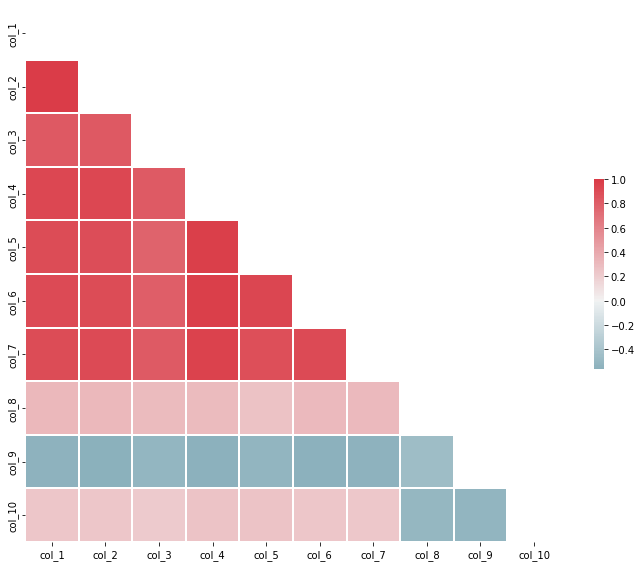

In [100]:
# Convertir les données en float
df = df.astype(float)

# Mise en place de la matrice de coorélation
corr                             = df.corr()
mask                             = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax                            = plt.subplots(figsize=(12,35))
cmap                             = sns.diverging_palette(220, 10, as_cmap=True)

# Visualisation de la matrice
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .1})

In [101]:
df = df.drop(columns =['col_1',	'col_2',	'col_3',	'col_4',	'col_5']).reset_index(drop=True)

In [102]:
df.head()

,col_6,col_7,col_8,col_9,col_10
0,0.1010,0.150,0.0,0.0,1.0
1,0.0485,0.070,0.0,0.0,1.0
2,0.1415,0.210,1.0,0.0,0.0
3,0.1140,0.155,0.0,0.0,1.0
4,0.0395,0.055,0.0,1.0,0.0


<AxesSubplot:>

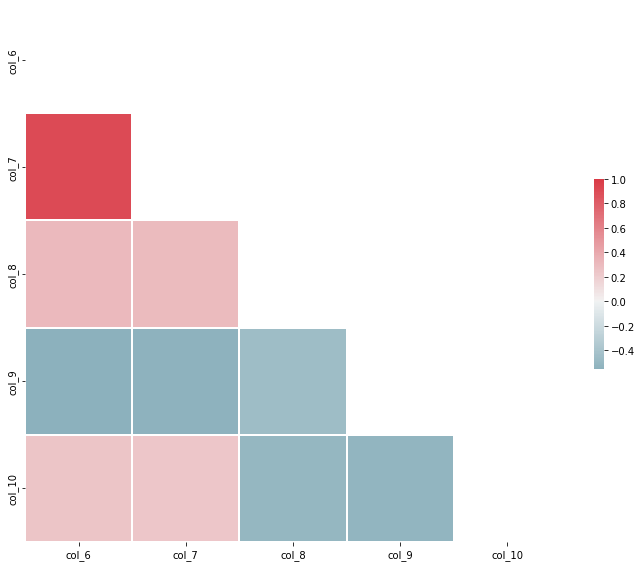

In [103]:
# Convertir les données en float
df = df.astype(float)

# Mise en place de la matrice de coorélation
corr                             = df.corr()
mask                             = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax                            = plt.subplots(figsize=(12,35))
cmap                             = sns.diverging_palette(220, 10, as_cmap=True)

# Visualisation de la matrice
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .1})

In [104]:
class myLDA(object):
    '''
    This class is for linear discriminant analysis classification.
    
    The class contains the parameters of LDA, including the number of classes and the prior probability p(i) of 
    each class $i$, where $i=1,2,\ldots,num_classes$. Moreover, the class contains the the mean vectors $\mu_i$ 
    and covariance matrix $\Sigma$ of probability distributions $p(x|i)$ for the class $i$.
    
    It also contains the functions for initializing the class, fitting the LDA classifier model, use 
    the fitted model to calculate the linear discriminant functions $\delta_i(x)$ and decision function $h^*(x)$.
    
    Attributes:
        mu (matrix, num_classes*num_features)    : mean vectors of distributions $p(x|i)$. The $i$-th row represents $\mu_i$.
        Sigma (matrix, num_features*num_features): covariance matrix
        num_classes (positive integer)           : the number of classes
        priorProbs (vector, num_classes)         : the prior probability vector and its $i$-th element is $p(i)$
        
    '''
    def __init__(self):
        '''
        Initialize the class by just assigning zero to all atrributes. 
        '''
        self.mu = 0 
        self.Sigma = 0
        self.num_classes = 0
        self.priorProbs = 0
        
    def fit(self, X, y):
        '''
        estimate the mean vector and covariance matrix of each class in the LDA model
        
        Args: 
            X (matrix, num_train*num_features): features of training samples
            y (matrix, num_train): label of training samples
            
        Returns:
            mu (matrix, num_classes*num_features)    : mean vectors of distributions $p(x|i)$. The $i$-th row represents $\mu_i$.
            Sigma (matrix, num_features*num_features): covariance matrix
        ''' 
        num_samples, num_features = X.shape
        values, counts = np.unique(y, return_counts = True)
        num_classes = len(values)
        ### calculate the prior probability $p(i)$
        self.priorProbs = counts / num_samples
        ### calculate the mean vector of each class $\mu_i$
        self.mu = np.zeros((num_classes, num_features))
        for k in range(num_samples):
            self.mu[int(y[k]),:] += X[k,:]
        self.mu = self.mu / np.expand_dims(counts, 1) 
        ### calculate the covariance matrix $\Sigma$
        Sigma_i = [np.cov(X[y == i].T)*(X[y == i].shape[0]-1) for i in range(num_classes)] 
        self.Sigma = sum(Sigma_i) / (X.shape[0]-num_classes)
        return self.mu, self.Sigma
    
    def linear_discriminant_func(self, X):
        '''
        calculate the linear discriminant functions $\delta_i(X)$
        
        Args: 
            X (matrix, num_samples*num_features): features of samples
            
        Returns:
            value (matrix, num_samples*num_classes): the linear discriminant function values. 
            The $(j,i)$-th entry of value represents $\delta_i(X[j,:])$, which is the linear discriminant function value for the class $i$ of the sample at row $j$.
        '''
        ### calculate the inverse matrix of the covariance matrix $\Sigma$
        U, S, V = np.linalg.svd(self.Sigma)
        Sn = np.linalg.inv(np.diag(S))
        Sigma_inv = np.dot(np.dot(V.T, Sn), U.T)
        ### calculate the linear discriminant function values of X
        value = np.dot(np.dot(X, Sigma_inv), self.mu.T) - \
                0.5 * np.multiply(np.dot(self.mu, Sigma_inv).T, self.mu.T).sum(axis = 0).reshape(1, -1) + \
                np.log(np.expand_dims(self.priorProbs, axis = 0))
        return value
    
    def predict(self, X):
        '''
        calculate the linear discriminant functions
        
        Args: 
            X (matrix, num_samples*num_features): features of samples
            
        Returns:
            pred_label (vector, num_samples): the predicted labels of samples. The $j$-th entry represents the predicted label of the sample at row $j$.
        '''
        pred_value = self.linear_discriminant_func(X)
        pred_label = np.argmax(pred_value, axis = 1)
        return pred_label

In [105]:
df.shape

(4177, 5)

In [106]:
dfx = df

In [107]:
# load datasets function
def data(dfx, dfy):
    scaler_X = StandardScaler()
    data_X = scaler_X.fit_transform(dfx)
    data_y = pd.Categorical(dfy).codes.reshape(-1)
    return data_X, data_y

In [108]:
def main_():
    X, Y = data(dfx, dfy)
    X = np.array(X)
    Y = np.array(Y)

    # Randomly assingning a train and test set
    train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.33, random_state=2200)
    return train_X, test_X, train_y, test_y

In [109]:
### initiate the LDA model
model = myLDA()
### fit the model with training data and get the estimation of mu and Sigma
mu, Sigma = model.fit(main_()[0], main_()[2])
### predict the label of test data
y_pred = model.predict(main_()[1])
### calculate the accuracy of the fitted LDA model on test data
accuracy = np.sum(y_pred == main_()[3])/len(main_()[3])
print("Accuracy of LDA on the test dataset is {}.".format(accuracy))

ValueError: Found input variables with inconsistent numbers of samples: [4177, 1]

In [95]:
# I am loading the full dataset and renaming the columns to keep better track of each attribute
data_dir = "..\..\..\data\data_classification"
data_path = os.path.join(data_dir, "abalone_classification.csv")
df = pd.read_csv(data_path, header=0)
col_names = ['col_1','col_2','col_3','col_4','col_5','col_6','col_7','col_8','name']
df.columns = col_names

df.head(3)

ValueError: Length mismatch: Expected axis has 11 elements, new values have 9 elements

In [ ]:
# Check for high correlation among features
df.corr()

,col_1,col_3,col_4,col_5,col_6,col_7,col_8
col_1,1.000000,-0.163951,0.158175,0.064922,0.005597,0.075043,-0.124540
col_3,-0.163951,1.000000,0.059668,-0.008083,0.009378,-0.185805,-0.022043
col_4,0.158175,0.059668,1.000000,-0.005931,-0.009040,-0.103591,-0.054797
col_5,0.064922,-0.008083,-0.005931,1.000000,-0.009674,0.043627,0.002829
col_6,0.005597,0.009378,-0.009040,-0.009674,1.000000,0.020900,-0.035659
col_7,0.075043,-0.185805,-0.103591,0.043627,0.020900,1.000000,0.089690
col_8,-0.124540,-0.022043,-0.054797,0.002829,-0.035659,0.089690,1.000000


In [ ]:
df.describe()

,col_1,col_3,col_4,col_5,col_6,col_7,col_8
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [ ]:
print(df.name.value_counts())

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: name, dtype: int64


<AxesSubplot:>

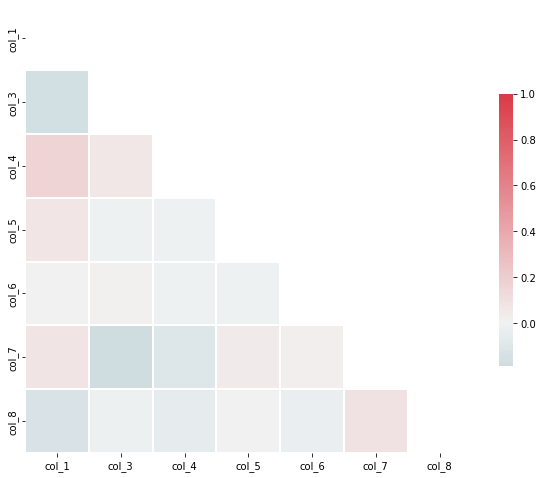

In [ ]:
# Mise en place de la matrice de coorélation
corr                             = df.corr()
mask                             = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax                            = plt.subplots(figsize=(10,50))
cmap                             = sns.diverging_palette(220, 10, as_cmap=True)

# Visualisation de la matrice
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .1})

I found a correlation between the different measurements of Hold, Pressure and Finger-Area with their averages. I also found a correlation with the different measurements of Hold.

In [ ]:
### initiate the LDA model
data_X = df.iloc[:,:-1]
data_y = df.iloc[:,-1]
scaler_X = StandardScaler()
data_X = scaler_X.fit_transform(data_X)
data_y = pd.Categorical(data_y).codes.reshape(-1)
# Randomly assingning a train and test set
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.20, random_state=13)

model = myLDA()
### fit the model with training data and get the estimation of mu and Sigma
mu, Sigma = model.fit(train_X, train_y)
### predict the label of test data
y_pred = model.predict(test_X)
### calculate the accuracy of the fitted LDA model on test data
accuracy = np.sum(y_pred == test_y)/len(test_y)
print("Accuracy of LDA on the test dataset is {}.".format(accuracy))

Accuracy of LDA on the test dataset is 0.5993265993265994.


In [ ]:
algo_f = RandomForestClassifier()
algo_lda = LinearDiscriminantAnalysis()
algo_dt = DecisionTreeClassifier()
model_forrest = algo_f.fit(main()[0], main()[2])
model_LDA = algo_lda.fit(main()[0], main()[2])
model_DT = algo_dt.fit(main()[0], main()[2])

In [ ]:
print(" Accuracy: %.3f for the DT model" % (model_DT.score(main()[1], main()[3])*100.0))
print(" Accuracy: %.3f for the forrest model" % (model_forrest.score(main()[1], main()[3])*100.0))
print(" Accuracy: %.3f for the LDA model" % (model_LDA.score(main()[1], main()[3])*100.0))

 Accuracy: 48.485 for the DT model
 Accuracy: 62.626 for the forrest model
 Accuracy: 54.882 for the LDA model


In [ ]:
# I again use the processed data from the logistic regression but this time I specify SVC

SVM_best_scores = {}
tree_param = {'criterion':['gini','entropy'],'max_depth':np.arange(3, 15)}
search_svm = GridSearchCV(estimator = algo_dt ,param_grid= tree_param,
                    cv = 5, return_train_score = True,
                    n_jobs = -1)

search_svm.fit(main()[0], main()[2])
SVM_best_scores = {'model':search_svm, 'best_params':search_svm.best_params_,
                        'best_score':search_svm.best_score_}

In [ ]:
SVM_best_scores['best_params']

{'criterion': 'gini', 'max_depth': 5}

In [ ]:
clf = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)

In [ ]:
# utilisation d'une grille complete avec toutes les parametres jugés nécessaires

param_grid = {
    "n_estimators": [10,20,71],
    "bootstrap": [False],
    "criterion": ["gini", "entropy"],
    "min_samples_split" : [3,7, 10],
    "max_depth" :range(10)[1:],
    "max_features": ['auto', 'sqrt']
}

# Effectuer grid search
grid_search = GridSearchCV(algo_f, param_grid=param_grid, cv=5)
grid_search.fit(main()[0], main()[2])
forrest_best_scores = {'model':grid_search, 'best_params':grid_search.best_params_,
                        'best_score':grid_search.best_score_}
forrest_best_scores

{'model': GridSearchCV(cv=5, estimator=RandomForestClassifier(),
              param_grid={'bootstrap': [False], 'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 10),
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_split': [3, 7, 10],
                          'n_estimators': [10, 20, 71]}),
 'best_params': {'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': 9,
  'max_features': 'auto',
  'min_samples_split': 10,
  'n_estimators': 71},
 'best_score': 0.626809204694536}

## Data Preparation

In [3]:
# load datasets function
def load_data(data_file_name):
    data_dir = "..\..\..\data\data_classification"
    data_path = os.path.join(data_dir, data_file_name)
    df = pd.read_csv(data_path, header=1)
    data_X = df.iloc[:,:-1]
    data_y = df.iloc[:,-1]
    scaler_X = StandardScaler()
    data_X = scaler_X.fit_transform(data_X)
    data_y = pd.Categorical(data_y).codes.reshape(-1)
    return data_X, data_y

In [4]:

def main():

    # read dataset from csv file
    data_name = "abalone_classification"
    data_X, data_y = load_data("{}.csv".format(data_name))

    # Train and test set
    # kf = KFold(n_splits=10)
    # res_list = []
    # for train_index, test_index in kf.split(data_X):
    #     train_X, train_y = data_X[train_index,:], data_y[train_index]
    #     test_X, test_y = data_X[test_index,:], data_y[test_index]
    return data_X, data_y

## Criterion -- Gini Index

In [5]:
def calculate_weighted_counts(y, sample_weight, classes_):
    '''
    the function used to calculate the summation of weights of samples from each class. Generally speaking,
    the weights are all set as one. But for Adaboost, each sample has different values.
    '''
    class_counts = np.zeros(shape=classes_.shape[0], dtype=np.float64)
    for i, label in enumerate(classes_):
        idx = y == label
        if idx.sum() > 0:
            class_counts[i] = sample_weight[idx].sum()
        else:
            class_counts[i] = 0
    return class_counts

def gini(y, sample_weight):
    classes_ = np.unique(y)
    class_counts = calculate_weighted_counts(y, sample_weight, classes_)
    if class_counts.sum() > 0:
        pk = class_counts / class_counts.sum()
        pk = pk[pk > 0]
        return 1 - np.sum(pk**2)
    else:
        return 0

def gini_index(X, y, feat, point, sample_weight):
    '''
    calculate the difference of gini index before and after splitting
    '''
    S = gini(y, sample_weight)
    new_S = 0
    n = sample_weight.sum()
    assert n > 0
    idx1 = X[:, feat] < point
    nv = sample_weight[idx1].sum()
    if nv > 0:
        new_S += nv / n * gini(y[idx1], sample_weight[idx1])
    idx2 = X[:, feat] >= point
    nv = sample_weight[idx2].sum()
    if nv > 0:
        new_S += nv / n * gini(y[idx2], sample_weight[idx2])
    return S - new_S

# 3. Decision Trees for Classification

Different from the classification tree implemented in the last tutorial:
1. Each internal node has two child nodes regardless of values of the splitting feature are continuous or discrete.
2. Add the parameter `max_depth` for providing another condition to stop splitting procedures.
3. Add the parameter `max_features` to use the subset of features to build decision tree.

Options 2&3 are designed for constructing trees in the random forest implemented in Section 5. 

If you'd like to build the classification tree, you can ignore options 2&3 by setting `max_depth = None` and `max_features = None`. Then we can combine it with the pre-pruning or post-pruning technique implemented in Section 4 to prevent overfitting.

In [6]:
class DecisionTreeClassifier(object):
    '''
    This class is for classification tree

    Attributes:
        - criterion: a function used as the criterion of classification tree
        - tree: a nested dictionary representing the decision tree structure.
        - max_depth: the parameter to control the depth of tree. If the depth is larger than max_depth, we will stop splitting.
        - max_feature: the number of selected features to build decision tree
    '''
    def __init__(self,
                 criterion=gini_index,
                 max_depth=None,
                 max_features=None,
                 random_seed=None):
        self.f_criterion = criterion
        self.max_depth = max_depth
        if self.max_depth is None:
            self.max_depth = 2**10
        self.max_features = max_features
        self.random_seed = random_seed

    def fit(self, X, y, sample_weight=None):
        np.random.seed(self.random_seed)
        num_samples, num_features = X.shape
        if self.max_features is None:
            self.max_features = num_features
        elif self.max_features == "sqrt":
            self.max_features = np.int(np.round(np.sqrt(num_features)))
        self.classes_ = np.unique(y)
        if sample_weight is None:
            sample_weight = np.ones(num_samples, dtype=np.float64)
        # build the decision tree
        self.tree = self.create_tree(X, y, sample_weight, depth=0)

    def create_tree(self, X, y, sample_weight, depth):
        Tree = {}
        Tree["depth"] = depth
        class_counts = calculate_weighted_counts(y, sample_weight, self.classes_)
        # create a leaf node if all samples belong to the same class
        if (class_counts != 0).sum() == 1:
            Tree["is_leaf"] = True
            Tree["pred"] = self.classes_[class_counts != 0]
        # using the majority vote to get the prediction at each node
        majority_class = self.classes_[np.argmax(class_counts)]
        Tree["pred"] = majority_class
        # create a leaf node if feature set is empty
        feat, point = self.choose_best_split(X, y, sample_weight)
        if feat is None or depth == self.max_depth:
            Tree["is_leaf"] = True
            return Tree
        # otherwise, create an internal node
        Tree["is_leaf"] = False
        Tree["split_feat"] = feat
        Tree["split_point"] = point
        # build the left subtree
        idx = X[:, feat] < point
        Tree["left"] = self.create_tree(X[idx], y[idx], sample_weight[idx],
                                        depth + 1)
        # build the right subtree
        idx = X[:, feat] >= point
        Tree["right"] = self.create_tree(X[idx], y[idx], sample_weight[idx],
                                         depth + 1)
        return Tree

    def choose_best_split(self, X, y, sample_weight):
        # initialization
        best_feat, best_point = None, None
        best_score = 0.0
        # search for each candidate feature
        num_features = X.shape[1]
        if self.max_features < num_features:
            candidate_feat = np.random.permutation(
                num_features)[:self.max_features]
        else:
            candidate_feat = np.arange(num_features)
        for feat in candidate_feat:
            # if all values of this feature are equal, do not split this feature
            X_feat_value = np.unique(X[:, feat])
            if len(X_feat_value) == 1:
                continue
            # search for each possible split point
            for i in range(len(X_feat_value) - 1):
                # divide the dataset into two parts according to the split
                point = (X_feat_value[i] + X_feat_value[i + 1]) / 2.0
                # calculate score to evaluate the quality of a split
                score = self.f_criterion(X, y, feat, point, sample_weight)
                if score > best_score:
                    best_feat = feat
                    best_point = point
                    best_score = score
        return best_feat, best_point

    def predict(self, X):
        '''
        function used to fit the decision tree classifier

        Args:
            X - features of test samples, a pandas dataframe with shape (n, d)

        Returns:
            y - predictions of test samples, a pandas series with shape (n,)
        '''
        n = X.shape[0]
        y = []
        for i in range(n):
            y.append(DecisionTreeClassifier.predict_each(X[i], self.tree))
        y = np.array(y, dtype=np.int32)
        return y

    @staticmethod
    def predict_each(x, tree):
        '''
        for each sample, get the prediction of decision tree classifier in a recursive manner.

        Args:
            x - features of a sample, a pandas Series with shape (d,)
            tree - a nested dictionary representing the decision tree structure.

        Returns:
            the prediction of the sample `x`
        '''
        if tree["is_leaf"] is True:
            # if the `tree` is a leaf node, get the prediction at the leaf node
            return tree["pred"]
        else:
            # the 'tree' is a nested dictionary
            # get the value of the feature used to split
            feat = tree["split_feat"]
            point = tree["split_point"]
            # get the value of the feature for the sample `x`
            value = x[feat]
            if value < point:
                return DecisionTreeClassifier.predict_each(x, tree["left"])
            else:
                return DecisionTreeClassifier.predict_each(x, tree["right"])

In [7]:
def t_t():
    # Randomly assingning a train and test set
    train_X, test_X, train_y, test_y = train_test_split(main()[0], main()[1], test_size=0.33, random_state=100)
    return train_X, test_X, train_y, test_y

In [8]:
X_train, X_test, y_train, y_test = t_t()
model = DecisionTreeClassifier(criterion=gini_index,
                                   max_depth=None,
                                   max_features=None,
                                   random_seed=None)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
acc_train = (y_train == y_train_hat).mean()
acc_test = (y_test == y_test_hat).mean()
print("The accuracy of training data is:", acc_train)
print("The accuracy of test data is:", acc_test)

The accuracy of training data is: 1.0
The accuracy of test data is: 0.20449601160261058


# 5. Random Forest for Classification

In this section, we implement the random forest where each tree is built with the class DecisionTreeClassifier(). In our model, the values of parameters are listed below. 
1. The number of trees $T$ is set as ``num_estimators = 20``
2. the number of subsampled features for each tree is $k =\sqrt{d}$, which corresponds to ``max_features = "sqrt"`` in the code.
3. The maximum depth of each tree is ``max_depth = 6``.

We will not use the pruning technique for each tree in the random forest.

In [9]:
class RandomForestClassifier(object):
    '''
    This class is for random forest classification

    Attributes:
        - criterion: a function used as the criterion of classification tree
        - num_estimators: the number of trees in the random forest 
        - tree: a nested dictionary representing the decision tree structure
        - max_depth: the parameter to control the depth of tree. If the depth is larger than max_depth, we will stop splitting.
        - max_feature: the number of selected features to build decision tree
    '''
    def __init__(self,
                 num_estimators,
                 random_state,
                 criterion=gini_index,
                 max_depth=None,
                 max_features="sqrt"):
        self.num_estimators = num_estimators
        self.random_state = random_state
        self.criterion = criterion
        self.max_depth = max_depth
        self.max_features = max_features

    def fit(self, X, y):
        '''
        function used to fit all trees in the random forest
        
        Args:
            X - the features of the training samples
            y - the labels of the training samples
        Returns:
            self.model_list - the model list containing `num_estimators` tree models
        '''
        n, d = X.shape
        RandomState = np.random.RandomState(self.random_state)
        self.model_list = []
        for t in range(self.num_estimators):
            random_seed = RandomState.randint(0, np.iinfo(np.int32).max)
            ### draw a bootstrapped dataset from X
            sample_index = RandomState.choice(np.arange(n), size=n, replace=True)
            X_sampled = X[sample_index, :]
            y_sampled = y[sample_index]
            ### initialize the tree model by using DecisionTreeClassifier()
            model = DecisionTreeClassifier(criterion=self.criterion,
                                           max_depth=self.max_depth,
                                           max_features=self.max_features,
                                           random_seed=random_seed)
            ### fit the tree model to the bootstrapped dataset by using DecisionTreeClassifier.fit()
            model.fit(X_sampled, y_sampled)
            self.model_list.append(model)
        return self.model_list

    def predict(self, X):
        '''
        function used to predict the labels of X
        
        Args:
            X - the features of the test samples
        Returns:
            y_pred_label - the predicted labels of test samples
        '''
        n = X.shape[0]
        y_pred = np.zeros([self.num_estimators, n], dtype=np.int32)
        y_pred_label = np.zeros(n, dtype=np.int32)
        ### use T tree classifiers to make predictions by using DecisionTreeClassifier.predict()
        for i in range(self.num_estimators):
            model_i = self.model_list[i]
            y_pred[i, :] = model_i.predict(X)
        ### take the majority vote 
        for i in range(n):
            classes, count = np.unique(y_pred[:, i], return_counts=True)
            y_pred_label[i] = classes[np.argmax(count)]
        return y_pred_label

In [10]:
X_train, X_test, y_train, y_test = t_t()
model = RandomForestClassifier(num_estimators=20,
                                   random_state=101,
                                   criterion=gini_index,
                                   max_depth=6)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
acc_train = (y_train == y_train_hat).mean()
acc_test = (y_test == y_test_hat).mean()
print("Training accuracy of the random forest is:", acc_train)
print("Testing accuracy of the random forest is:", acc_test)

C:\Users\josep\AppData\Local\Temp\ipykernel_3900\4230132589.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.max_features = np.int(np.round(np.sqrt(num_features)))


Training accuracy of the random forest is: 0.3385770468358956
Testing accuracy of the random forest is: 0.25598259608411894
